<a href="https://colab.research.google.com/github/vinayakansajeev/ML/blob/main/Credit_Card_Default_Analysis_with_Exports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Setting up output directory ---
Mounted at /content/drive
All outputs will be saved to: /content/drive/MyDrive/credit_card_analysis_outputs/
--------------------------------------------------

--- Section 1: Data Loading & Basic Inspection ---
Memory usage of dataframe is 5.72 MB
Memory usage after optimization is: 1.86 MB
Decreased by 67.5%
--------------------------------------------------

--- Section 2: Data Preprocessing & Exploratory Analysis ---


/tmp/ipython-input-2554294125.py:52: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not is_datetime64_any_dtype(df[col]) and not is_categorical_dtype(df[col]):
/tmp/ipython-input-2554294125.py:52: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not is_datetime64_any_dtype(df[col]) and not is_categorical_dtype(df[col]):
/tmp/ipython-input-2554294125.py:52: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not is_datetime64_any_dtype(df[col]) and not is_categorical_dtype(df[col]):
/tmp/ipython-input-2554294125.py:52: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Memory usage of dataframe is 3.32 MB
Memory usage after optimization is: 3.20 MB
Decreased by 3.4%

Summary Statistics:
                                  Mean    Std Dev        min       25%  \
ID                           15000.50    8660.40       1.00   7500.75   
LIMIT_BAL                   167484.33  129743.38   10000.00  50000.00   
SEX                              0.40       0.49       0.00      0.00   
AGE                             35.49       9.22      21.00     28.00   
PAY_0                           -0.02       1.12      -2.00     -1.00   
PAY_2                           -0.13       1.20      -2.00     -1.00   
PAY_3                           -0.17       1.20      -2.00     -1.00   
PAY_4                           -0.22       1.17      -2.00     -1.00   
PAY_5                           -0.27       1.13      -2.00     -1.00   
PAY_6                           -0.29       1.15      -2.00     -1.00   
BILL_AMT1                    51223.34   73635.77 -165580.00   3558.75   
BIL

/tmp/ipython-input-2554294125.py:52: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not is_datetime64_any_dtype(df[col]) and not is_categorical_dtype(df[col]):
/tmp/ipython-input-2554294125.py:52: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not is_datetime64_any_dtype(df[col]) and not is_categorical_dtype(df[col]):
/tmp/ipython-input-2554294125.py:52: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if col_type != object and not is_datetime64_any_dtype(df[col]) and not is_categorical_dtype(df[col]):
/tmp/ipython-input-2554294125.py:52: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Exported summary statistics to /content/drive/MyDrive/credit_card_analysis_outputs/summary_statistics.tex

Saved correlation matrix heatmap to /content/drive/MyDrive/credit_card_analysis_outputs/correlation_matrix.png


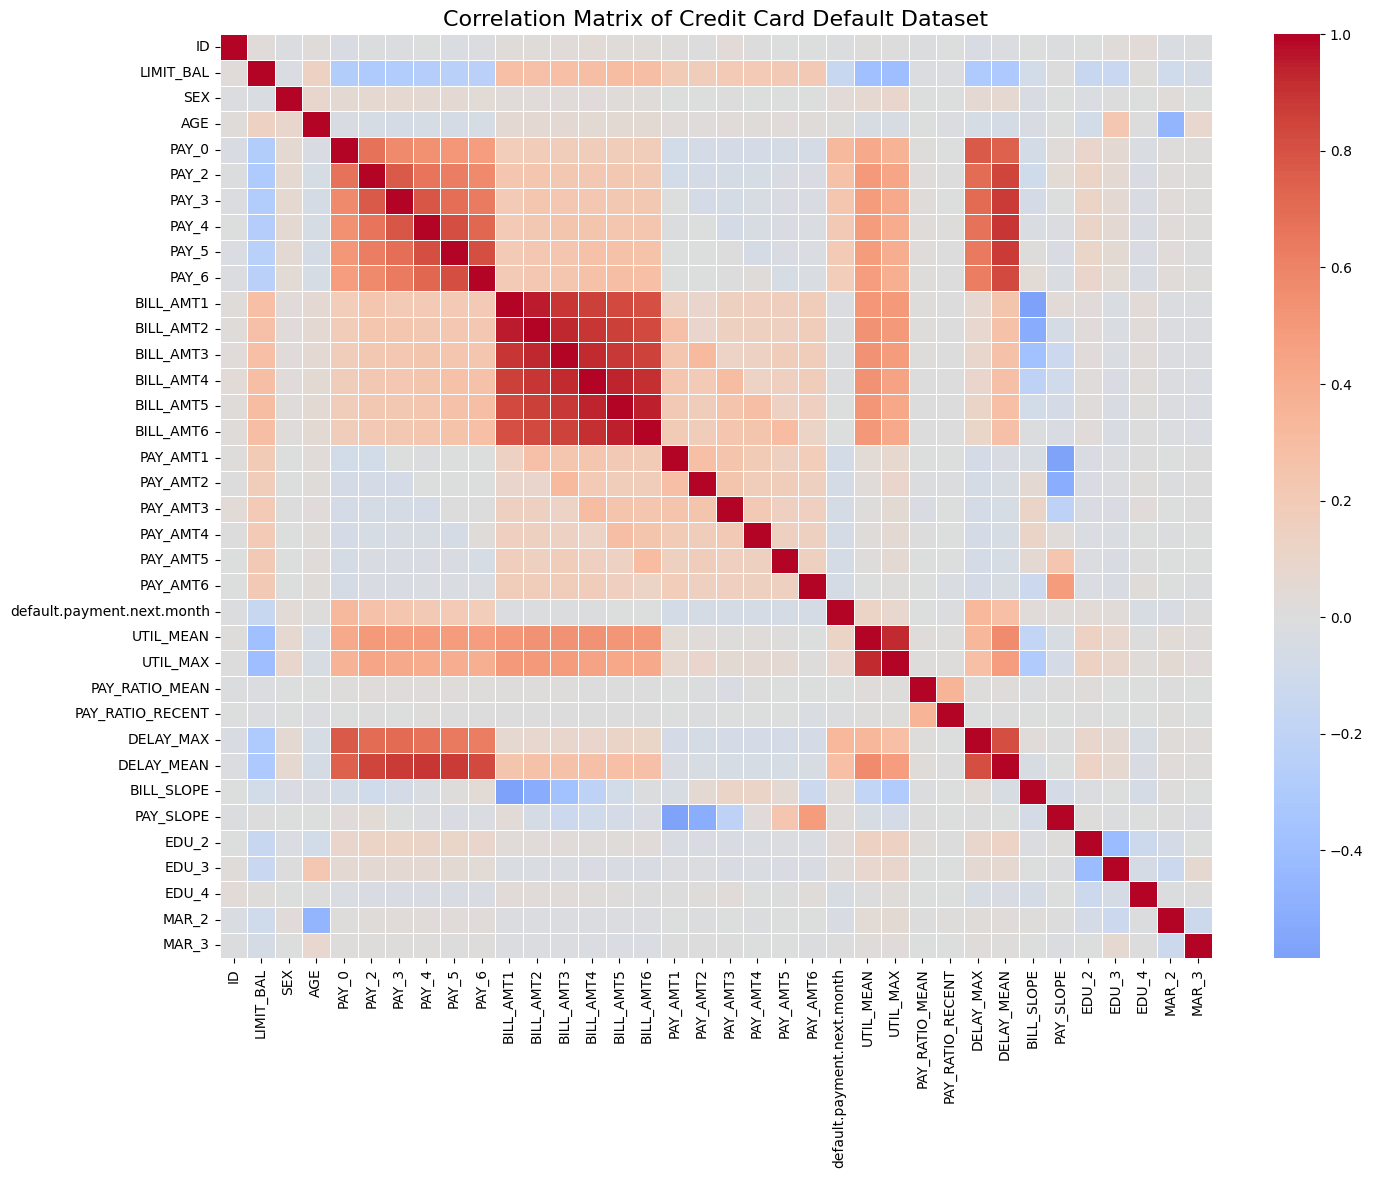


Training samples: 21000, Test samples: 9000
--------------------------------------------------

--- Section 3: Baseline Models ---
Logistic Regression AUC: 0.7298
Exported Logistic Regression classification report to /content/drive/MyDrive/credit_card_analysis_outputs/logistic_regression_classification_report.tex
Exported Logistic Regression confusion matrix to /content/drive/MyDrive/credit_card_analysis_outputs/logistic_regression_confusion_matrix.tex

LASSO AUC: 0.7298  |  Best C: 100
Exported LASSO classification report to /content/drive/MyDrive/credit_card_analysis_outputs/lasso_classification_report.tex
Exported LASSO confusion matrix to /content/drive/MyDrive/credit_card_analysis_outputs/lasso_confusion_matrix.tex
--------------------------------------------------

--- Section 4: Random Forest Classifier ---
Random Forest AUC: 0.7627
Exported Random Forest classification report to /content/drive/MyDrive/credit_card_analysis_outputs/random_forest_classification_report.tex
Exporte

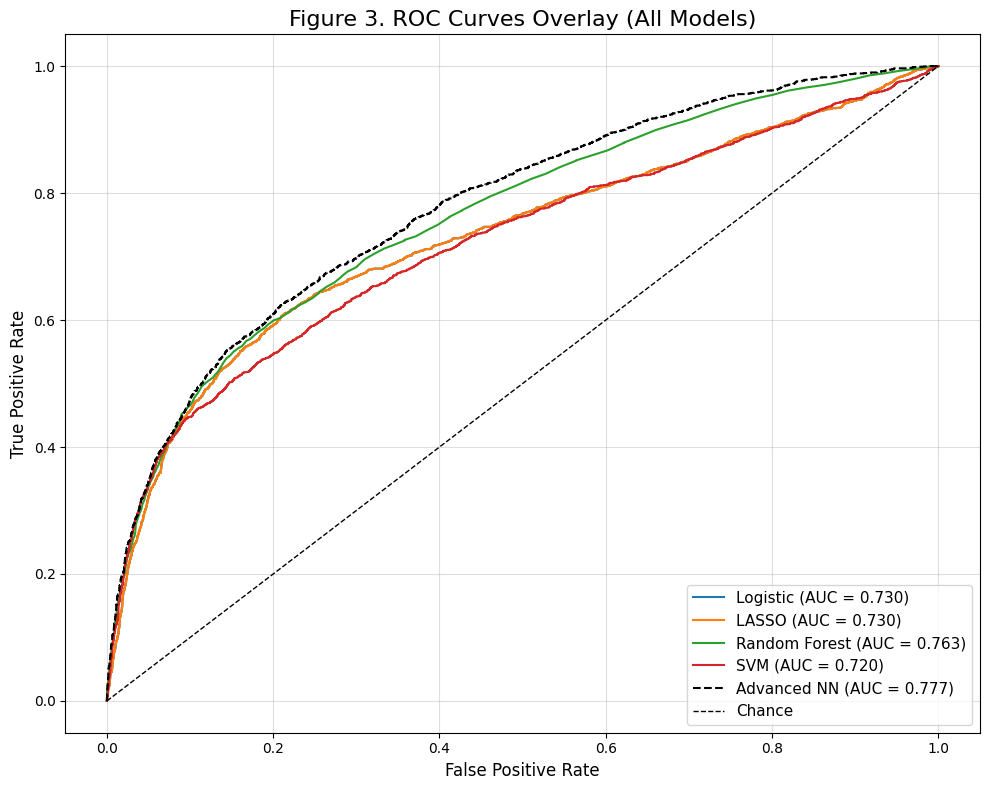

--------------------------------------------------
Script finished. All outputs saved.


In [ ]:
# Comprehensive, Colab-Ready Script for Credit Card Default Prediction
# This script is ordered according to the sections of a research paper.
# --- OPTIMIZED FOR MEMORY USAGE & ADDED EXPORT CAPABILITIES ---

# SECTION 0: Import necessary libraries
import pandas as pd
import numpy as np
import gc # Garbage Collector interface
import os # To create directories
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    confusion_matrix,
    average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, regularizers, optimizers
from pandas.api.types import is_datetime64_any_dtype, is_categorical_dtype

# --- SETUP OUTPUT DIRECTORY ---
print("--- Setting up output directory ---")
drive.mount('/content/drive')
output_path = '/content/drive/MyDrive/credit_card_analysis_outputs/'
os.makedirs(output_path, exist_ok=True)
print(f"All outputs will be saved to: {output_path}")
print("-" * 50)


# --- HELPER FUNCTIONS ---

def reduce_mem_usage(df, verbose=True):
    """Iterate through all columns of a dataframe and modify the data type to reduce memory usage."""
    start_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print(f'Memory usage of dataframe is {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object and not is_datetime64_any_dtype(df[col]) and not is_categorical_dtype(df[col]):
            c_min, c_max = df[col].min(), df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print(f'Memory usage after optimization is: {end_mem:.2f} MB')
        print(f'Decreased by {100 * (start_mem - end_mem) / start_mem:.1f}%')
    return df

def export_classification_report(y_true, y_pred, model_name):
    """Generates and exports a classification report to a LaTeX file."""
    report_dict = classification_report(y_true, y_pred, digits=3, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    # Format columns for better presentation
    report_df['support'] = report_df['support'].astype(int)
    filename = f"{output_path}{model_name.lower().replace(' ', '_')}_classification_report.tex"
    report_df.to_latex(filename,
                       caption=f'Classification Report for {model_name}.',
                       label=f'tab:report_{model_name.lower().replace(" ", "_")}',
                       float_format="%.3f",
                       column_format='lrrrr')
    print(f"Exported {model_name} classification report to {filename}")

def export_confusion_matrix(y_true, y_pred, model_name):
    """Generates and exports a confusion matrix to a LaTeX file."""
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm,
                         index=['Actual Negative (0)', 'Actual Positive (1)'],
                         columns=['Predicted Negative (0)', 'Predicted Positive (1)'])
    filename = f"{output_path}{model_name.lower().replace(' ', '_')}_confusion_matrix.tex"
    cm_df.to_latex(filename,
                   caption=f'Confusion Matrix for {model_name}.',
                   label=f'tab:cm_{model_name.lower().replace(" ", "_")}')
    print(f"Exported {model_name} confusion matrix to {filename}")


# --- SECTION 1: Data Loading & Basic Inspection ---
print("\n--- Section 1: Data Loading & Basic Inspection ---")
path = '/content/drive/MyDrive/Unibo Academic/ml/ML all files/UCI_Credit_Card.csv'
df = pd.read_csv(path)
df = reduce_mem_usage(df)
print("-" * 50)


# --- SECTION 2: Data Preprocessing & Exploratory Analysis ---
print("\n--- Section 2: Data Preprocessing & Exploratory Analysis ---")
df = df.drop_duplicates().dropna().copy()
if 'EDUCATION' in df.columns: df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
if 'MARRIAGE' in df.columns: df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})
if 'SEX' in df.columns: df['SEX'] = df['SEX'].map({1: 1, 2: 0})

def safe_div(a, b):
    b = np.where(b == 0, np.nan, b)
    return np.nan_to_num(a / b, nan=0.0, posinf=0.0, neginf=0.0)

bill_cols, pay_cols = [f'BILL_AMT{i}' for i in range(1, 7)], [f'PAY_AMT{i}' for i in range(1, 7)]
BILL, PAY, LIMIT = df[bill_cols].values, df[pay_cols].values, df[['LIMIT_BAL']].values
df['UTIL_MEAN'] = safe_div(BILL.mean(axis=1), LIMIT.flatten()) # Changed LIMIT.ravel() to LIMIT.flatten()
df['UTIL_MAX'] = safe_div(BILL.max(axis=1), LIMIT.flatten()) # Changed LIMIT.ravel() to LIMIT.flatten()
pay_ratio = safe_div(PAY, BILL)
df['PAY_RATIO_MEAN'], df['PAY_RATIO_RECENT'] = pay_ratio.mean(axis=1), pay_ratio[:, 0]
delay_cols = [c for c in ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'] if c in df.columns]
delays = df[delay_cols].values
df['DELAY_MAX'], df['DELAY_MEAN'] = delays.max(axis=1), delays.mean(axis=1)
x_months = np.arange(1, 7)
df['BILL_SLOPE'] = np.polyfit(x_months, BILL.T, 1)[0]
df['PAY_SLOPE']  = np.polyfit(x_months, PAY.T,  1)[0]
del BILL, PAY, LIMIT, delays, pay_ratio; gc.collect()

categoricals = [c for c in ['EDUCATION', 'MARRIAGE'] if c in df.columns]
df = pd.get_dummies(df, columns=categoricals, drop_first=True, prefix=['EDU','MAR'])
df = reduce_mem_usage(df)

summary = df.describe().T[['mean','std','min','25%','50%','75%','max']].round(2)
summary.rename(columns={'mean':'Mean','std':'Std Dev','50%':'Median'}, inplace=True)
print("\nSummary Statistics:\n", summary)
summary_filename = f"{output_path}summary_statistics.tex"
summary.to_latex(summary_filename, caption='Descriptive Statistics of the Preprocessed Dataset.', label='tab:summary', float_format="%.2f")
print(f"Exported summary statistics to {summary_filename}")

corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5, annot=False)
plt.title("Correlation Matrix of Credit Card Default Dataset", fontsize=16)
corr_filename = f"{output_path}correlation_matrix.png"
plt.savefig(corr_filename, dpi=300, bbox_inches='tight')
print(f"\nSaved correlation matrix heatmap to {corr_filename}")
plt.show()

TARGET = 'default.payment.next.month'
X = df.drop(columns=['ID', TARGET], errors='ignore')
y = df[TARGET].astype(int).values
del df; gc.collect()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print(f"\nTraining samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print("-" * 50)


# --- SECTION 3: Baseline Models (Logistic & LASSO) ---
print("\n--- Section 3: Baseline Models ---")
log_clf = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42).fit(X_train_scaled, y_train)
proba_log = log_clf.predict_proba(X_test_scaled)[:, 1]
pred_log = (proba_log >= 0.5).astype(int)
print(f"Logistic Regression AUC: {roc_auc_score(y_test, proba_log):.4f}")
export_classification_report(y_test, pred_log, "Logistic Regression")
export_confusion_matrix(y_test, pred_log, "Logistic Regression")

grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42),
                    {'C': [0.01, 0.1, 1, 10, 100]}, cv=5, scoring='roc_auc', n_jobs=-1).fit(X_train_scaled, y_train)
proba_lasso = grid.best_estimator_.predict_proba(X_test_scaled)[:, 1]
pred_lasso = (proba_lasso >= 0.5).astype(int)
print(f"\nLASSO AUC: {roc_auc_score(y_test, proba_lasso):.4f}  |  Best C: {grid.best_params_['C']}")
export_classification_report(y_test, pred_lasso, "LASSO")
export_confusion_matrix(y_test, pred_lasso, "LASSO")
print("-" * 50)


# --- SECTION 4: Random Forest Classifier ---
print("\n--- Section 4: Random Forest Classifier ---")
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, max_depth=None).fit(X_train, y_train)
proba_rf = rf_clf.predict_proba(X_test)[:, 1]
pred_rf = rf_clf.predict(X_test)
print(f"Random Forest AUC: {roc_auc_score(y_test, proba_rf):.4f}")
export_classification_report(y_test, pred_rf, "Random Forest")
export_confusion_matrix(y_test, pred_rf, "Random Forest")
print("-" * 50)


# --- SECTION 5: Support Vector Machine (SVM) ---
print("\n--- Section 5: Support Vector Machine (SVM) ---")
svm_clf = SVC(kernel='rbf', probability=True, random_state=42).fit(X_train_scaled, y_train)
proba_svm = svm_clf.predict_proba(X_test_scaled)[:, 1]
pred_svm = (proba_svm >= 0.5).astype(int)
print(f"SVM AUC: {roc_auc_score(y_test, proba_svm):.4f}")
export_classification_report(y_test, pred_svm, "SVM")
export_confusion_matrix(y_test, pred_svm, "SVM")
print("-" * 50)


# --- SECTION 6: Advanced Neural Network ---
print("\n--- Section 6: Advanced Neural Network ---")
tf.keras.utils.set_random_seed(42)
neg, pos = np.bincount(y_train)
class_weight = {0: (1 / neg) * ((neg + pos) / 2.0), 1: (1 / pos) * ((neg + pos) / 2.0)}

def build_advanced_model(input_dim, width=256, l2=5e-5, dropout=0.35, base_lr=3e-3):
    inp = layers.Input(shape=(input_dim,))
    x = layers.Dense(width, kernel_regularizer=regularizers.l2(l2))(inp)
    x = layers.BatchNormalization()(x); x = layers.Activation('gelu')(x); x = layers.Dropout(dropout)(x)
    x = layers.Dense(width//2, kernel_regularizer=regularizers.l2(l2))(x)
    x = layers.BatchNormalization()(x); x = layers.Activation('gelu')(x); x = layers.Dropout(dropout)(x)
    x = layers.Dense(width//4, kernel_regularizer=regularizers.l2(l2))(x)
    x = layers.BatchNormalization()(x); x = layers.Activation('gelu')(x); x = layers.Dropout(dropout/2)(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inp, out)
    schedule = optimizers.schedules.CosineDecayRestarts(base_lr, 5 * max(1, len(X_train_scaled)//512), t_mul=2.0, m_mul=0.8)
    model.compile(optimizer=optimizers.AdamW(learning_rate=schedule, weight_decay=1e-4),
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(curve='ROC', name='auc_roc'), tf.keras.metrics.AUC(curve='PR', name='auc_pr')])
    return model

model = build_advanced_model(X_train_scaled.shape[1])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_auc_roc', mode='max', patience=8, restore_best_weights=True)
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50,
          batch_size=512, class_weight=class_weight, callbacks=[early_stop], verbose=1)

proba_nn = model.predict(X_test_scaled, verbose=0).ravel()
print(f"\nAdvanced NN Test ROC-AUC: {roc_auc_score(y_test, proba_nn):.4f} | PR-AUC: {average_precision_score(y_test, proba_nn):.4f}")
thresholds = np.linspace(0.2, 0.8, 121)
f1_scores = [f1_score(y_test, (proba_nn >= t).astype(int)) for t in thresholds]
best_thr = thresholds[np.argmax(f1_scores)]
print(f"Best threshold by F1 score: {best_thr:.3f} (F1 = {np.max(f1_scores):.3f})")
final_pred_nn = (proba_nn >= best_thr).astype(int)
export_classification_report(y_test, final_pred_nn, "Advanced NN")
export_confusion_matrix(y_test, final_pred_nn, "Advanced NN")
print("-" * 50)


# --- SECTION 7: ROC Curves Overlay ---
print("\n--- Section 7: Generating and Saving ROC Curves Overlay ---")
fpr_log, tpr_log, _ = roc_curve(y_test, proba_log)
fpr_las, tpr_las, _ = roc_curve(y_test, proba_lasso)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, proba_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, proba_svm)
fpr_nn, tpr_nn, _ = roc_curve(y_test, proba_nn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic (AUC = {roc_auc_score(y_test, proba_log):.3f})')
plt.plot(fpr_las, tpr_las, label=f'LASSO (AUC = {roc_auc_score(y_test, proba_lasso):.3f})')
plt.plot(fpr_rf,  tpr_rf,  label=f'Random Forest (AUC = {roc_auc_score(y_test, proba_rf):.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, proba_svm):.3f})')
plt.plot(fpr_nn, tpr_nn, label=f'Advanced NN (AUC = {roc_auc_score(y_test, proba_nn):.3f})', color='black', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Chance')

plt.title('Figure 3. ROC Curves Overlay (All Models)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.4)
plt.tight_layout()
roc_filename = f"{output_path}roc_curves_overlay.png"
plt.savefig(roc_filename, dpi=300, bbox_inches='tight')
print(f"Saved ROC curves overlay to {roc_filename}")
plt.show()
print("-" * 50)
print("Script finished. All outputs saved.")